In [2]:
import numpy as np
from matplotlib import pyplot as plt
import csv
from scipy.misc import imresize
%matplotlib inline

Чтение данных. Изображения записаны в байтовом массиве, в котором первые 2 байта хранят размеры (ширину и высоту), после которых идёт по байту на пиксель изображения, выписаного построчно. Метка класса - строка формата "источник_название"

In [3]:
train_data = np.fromfile("Desktop/Documents/Contest/Data/trainImages.dmp", dtype=np.uint8)
train_labels = []
with open("Desktop/Documents/Contest/Data/trainLabels.txt") as csvfile:
    values = csv.reader(csvfile, delimiter=',')
    for value in values:
        train_labels.append(value[1])
train_labels=train_labels[1:]

In [4]:
def parse_image_data(trainData):
    i = 0
    images = []
    while i < len(trainData):
        width = trainData[i]
        i += 1
        height = trainData[i]
        i += 1
        size = int(width) * height
        image = trainData[i:i + size]
        i += size
        images.append(image.reshape(width, height))
    return images

In [5]:
train_data = parse_image_data(train_data)

Посмотрим на произвольный элемент обучающей выборки

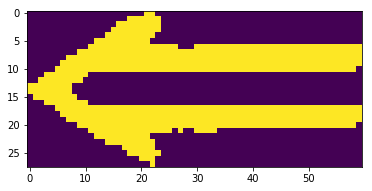

Arrow_Leftarrow


In [6]:
index = 0
plt.imshow( train_data[index] )
plt.show()
print(train_labels[index])

Считаем тестовую выборку: формат хранения такой же как у обучающей

In [7]:
test_data = np.fromfile("Desktop/Documents/Contest/Data/testImages.dmp", dtype=np.uint8)
test_data = parse_image_data(test_data)

Посмотрим на произвольный элемент тестовой выборки

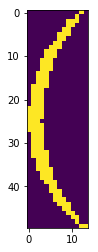

In [8]:
index = 100
plt.imshow( test_data[index] )
plt.show()

В качестве базового решения рассмотрим неоптимальный псевдо-растровый классификатор: изображение 14x14 в качестве признаков и модель KNN в качестве итогового классификатора. Приведение к размеру производим напрямую.

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


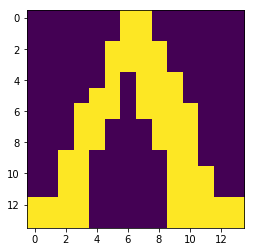

In [9]:
plt.imshow( imresize(train_data[1234], (14, 14)) )
plt.show()

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


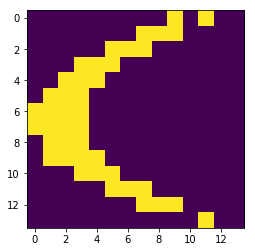

In [10]:
plt.imshow( imresize(test_data[100], (14, 14)) )
plt.show()

Столь непосредственно приводить размеры изображения, естественно, плохо - приемлимо лишь для базового решения

In [58]:
size = 14
train_data_resized = list( map( lambda image: np.ravel(imresize(image, (size, size))), train_data ) )
test_data_resized = list( map( lambda image: np.ravel(imresize(image, (size, size))), test_data ) )

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
print(len(train_data_resized))
print(len(test_data_resized))

200000
57765


In [60]:
print(len(set(train_labels)))

316


In [61]:
print(len(train_data_resized[40]))

196


Позапускаем kNN с различными вариациями и найдем лучший:

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
clf = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto', leaf_size=50, 
                           p=2, metric='minkowski', metric_params=None, n_jobs=-1)

In [73]:
clf.fit(train_data_resized, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=50, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [74]:
labels_predicted = clf.predict(test_data_resized)

Запишем результат в файл

In [75]:
f = open("Desktop/Documents/Contest/Data/final.txt","w")
f.write("Id,Category\n")
for i, label in enumerate(labels_predicted):
    f.write(str(i) + "," + label + "\n")
f.close()